In [1]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import datetime as dt
import pandas as pd

In [2]:
Ticker = "AAPL"
start_date = dt.date(2010,1,1)
interval = "1d"
data = yf.download(tickers=Ticker,start= start_date,interval= interval)
data.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2010-01-04,6.412382,6.427063,6.363542,6.395003,493729600
2010-01-05,6.423470,6.459726,6.389612,6.430063,601904800
2010-01-06,6.321296,6.448938,6.314704,6.423470,552160000
2010-01-07,6.309610,6.352158,6.263767,6.344667,477131200
2010-01-08,6.351558,6.352157,6.264067,6.301220,447610800


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4053 entries, 2010-01-04 to 2026-02-12
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   4053 non-null   float64
 1   (High, AAPL)    4053 non-null   float64
 2   (Low, AAPL)     4053 non-null   float64
 3   (Open, AAPL)    4053 non-null   float64
 4   (Volume, AAPL)  4053 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 190.0 KB


In [4]:
data.describe()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,4053.000000,4053.000000,4053.000000,4053.000000,4.053000e+03
mean,78.759987,79.543166,77.908662,78.699849,2.178222e+08
std,76.301195,77.050704,75.485607,76.233486,2.151659e+08
min,5.754396,5.872749,5.700462,5.763984,1.791060e+07
25%,18.300207,18.476273,18.128214,18.368222,7.685710e+07
50%,39.409100,39.850278,38.919519,39.383142,1.301024e+08
75%,143.771805,145.345368,142.306549,143.683996,2.885640e+08
max,285.922455,288.350192,283.035157,285.932471,1.880998e+09


In [25]:
val = data["Close"].squeeze()
ret = val.pct_change()

df = pd.DataFrame({"Close":val,"return":ret}, index=data.index).dropna()
df.index = pd.to_datetime(df.index)
df

,Close,return
Date,,
2010-01-05,6.423470,0.001729
2010-01-06,6.321296,-0.015906
2010-01-07,6.309610,-0.001849
2010-01-08,6.351558,0.006648
2010-01-11,6.295528,-0.008821
...,...,...
2026-02-06,277.859985,0.008010
2026-02-09,274.619995,-0.011661
2026-02-10,273.679993,-0.003423


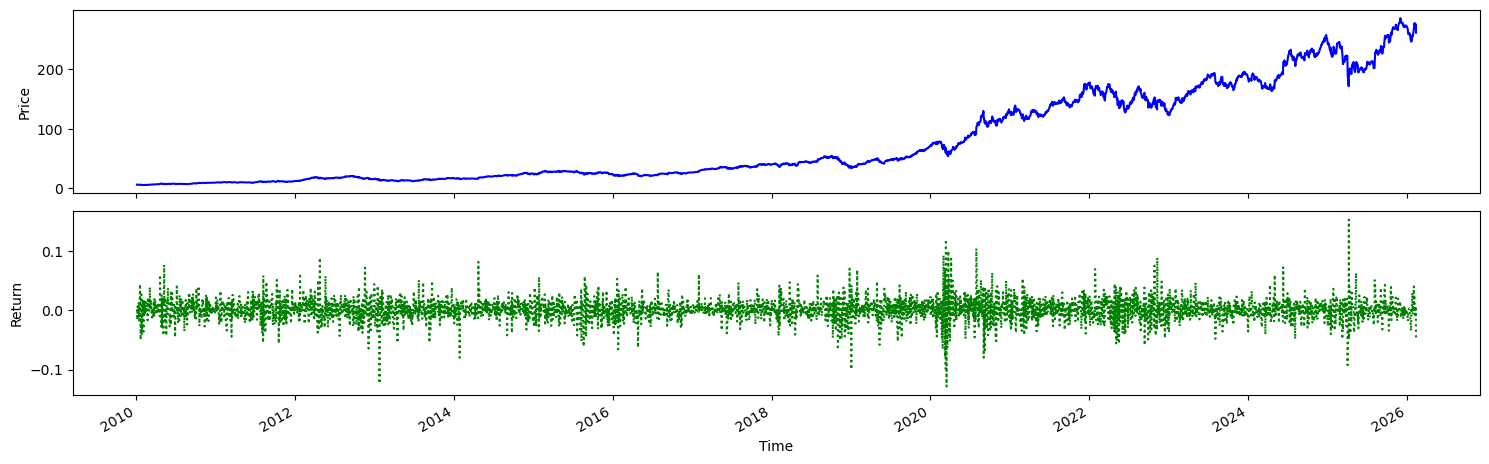

In [26]:
fig, ax = plt.subplots(ncols=1, nrows=2, figsize = (15,5),sharex=True)

ax[0].plot(df.index,df.Close, linestyle = "-", color = "blue")
ax[0].set_ylabel("Price")

ax[1].plot(df.index,df["return"], linestyle = ":", color = "green")
ax[1].set_xlabel("Time")
ax[1].set_ylabel("Return")

plt.tight_layout()
fig.autofmt_xdate() 
plt.show()

In [27]:
split = int(len(df) * 0.8)
split

3241

In [28]:
train = df.iloc[:split]
test = df.iloc[split:]

In [29]:
def MAPE(y_true, y_pred):
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

# Prediction using historical mean

In [31]:
hist_mean = np.mean(train.loc[:,"Close"].values)
test.loc[:,"Hist_mean_pred"] = hist_mean
print(f"Historical mean value is: {round(hist_mean,2)}")

Historical mean value is: 47.87


In [32]:
hist_mean_mape = MAPE(test.loc[:,"Close"], test.loc[:,"Hist_mean_pred"])
print(f"Mape: {round(hist_mean_mape,2)}%")

Mape: 75.5%


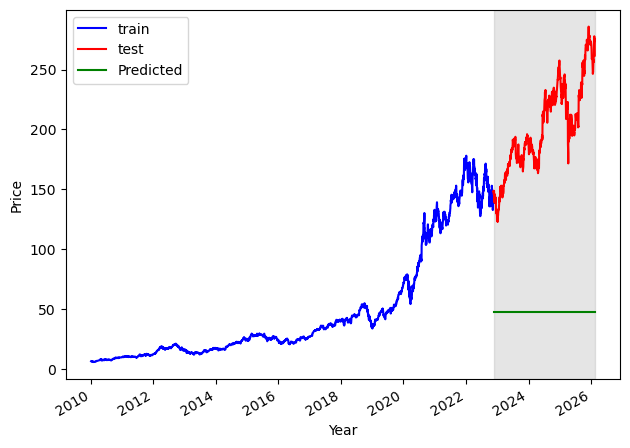

In [33]:
fig , ax = plt.subplots()

ax.plot(train.index, train["Close"],color = "blue", label = "train")
ax.plot(test.index, test["Close"],color = "red", label = "test")
ax.plot(test.index, test["Hist_mean_pred"], color = "green", label = "Predicted")
ax.set_xlabel("Year")
ax.set_ylabel("Price")
ax.legend(loc = "best")
ax.axvspan(xmin = test.index[0], xmax=test.index[-1],color = "grey", alpha = 0.2)

plt.tight_layout()
fig.autofmt_xdate() 
plt.show()

# Prediction using last year mean

In [37]:
df_2025 = df.loc["2025"]
df_2025

,Close,return
Date,,
2025-01-02,242.525162,-0.026236
2025-01-03,242.037827,-0.002009
2025-01-06,243.668900,0.006739
2025-01-07,240.894058,-0.011388
2025-01-08,241.381409,0.002023
...,...,...
2025-12-24,273.554016,0.005324
2025-12-26,273.144409,-0.001497
2025-12-29,273.504089,0.001317


In [39]:
last_year_mean = np.mean(df_2025.values)
test.loc[:,"last_year_mean_pred"] = last_year_mean
print(f"Last year mean {round(last_year_mean,2)}")

Last year mean 115.78


In [40]:
last_year_mean_mape = MAPE(test.loc[:,"Close"], test.loc[:,"last_year_mean_pred"])
print(f"Mape: {round(last_year_mean_mape,2)}%")

Mape: 40.75%


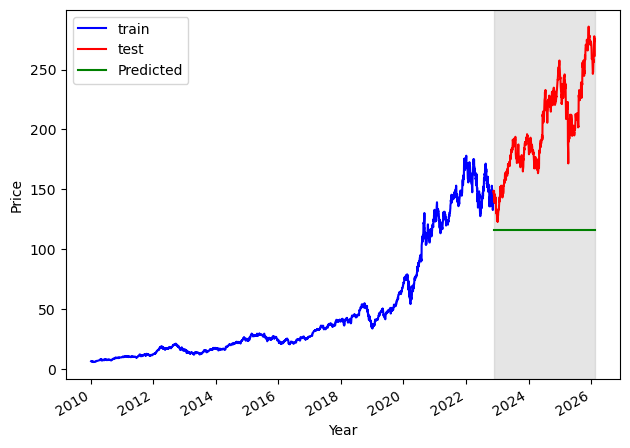

In [41]:
fig , ax = plt.subplots()

ax.plot(train.index, train["Close"],color = "blue", label = "train")
ax.plot(test.index, test["Close"],color = "red", label = "test")
ax.plot(test.index, test["last_year_mean_pred"], color = "green", label = "Predicted")
ax.set_xlabel("Year")
ax.set_ylabel("Price")
ax.legend(loc = "best")
ax.axvspan(xmin = test.index[0], xmax=test.index[-1],color = "grey", alpha = 0.2)

plt.tight_layout()
fig.autofmt_xdate() 
plt.show()

# Prediction using last known value

In [44]:
last_know_value = train["Close"].iloc[-1]
print(f"Last known value is: {last_know_value}")
test.loc[:,"last_known_value"] = last_know_value

Last known value is: 146.441650390625


In [58]:
last_year_known_mape = MAPE(test.loc[:,"Close"], test.loc[:,"last_known_value"])
print(f"Mape: {round(last_year_mean_mape,2)}%")

Mape: 26.04%


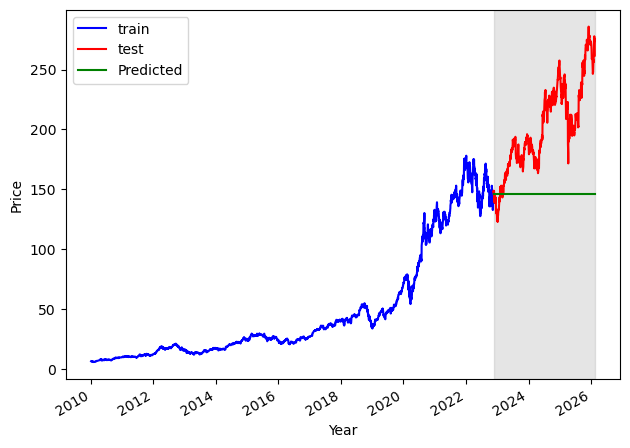

In [46]:
fig , ax = plt.subplots()

ax.plot(train.index, train["Close"],color = "blue", label = "train")
ax.plot(test.index, test["Close"],color = "red", label = "test")
ax.plot(test.index, test["last_known_value"], color = "green", label = "Predicted")
ax.set_xlabel("Year")
ax.set_ylabel("Price")
ax.legend(loc = "best")
ax.axvspan(xmin = test.index[0], xmax=test.index[-1],color = "grey", alpha = 0.2)

plt.tight_layout()
fig.autofmt_xdate() 
plt.show()

# Naive Seasonal Forecast

In [51]:
period = 5   # weekly trading cycle (Mon–Fri)
last_season_value = train["Close"].iloc[-period:].values
last_season_value


array([144.55195618, 147.33731079, 145.93969727, 147.67190552,
       146.44165039])

In [54]:
test["last_season_value"] = np.tile(last_season_value,len(test))[:len(test)]

C:\Users\danie\AppData\Local\Temp\ipykernel_18484\746138775.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["last_season_value"] = np.tile(last_season_value,len(test))[:len(test)]


In [59]:
naive_season_mape = MAPE(test.loc[:,"Close"], test.loc[:,"last_season_value"])
print(f"Mape: {round(last_year_mean_mape,2)}%")

Mape: 26.04%


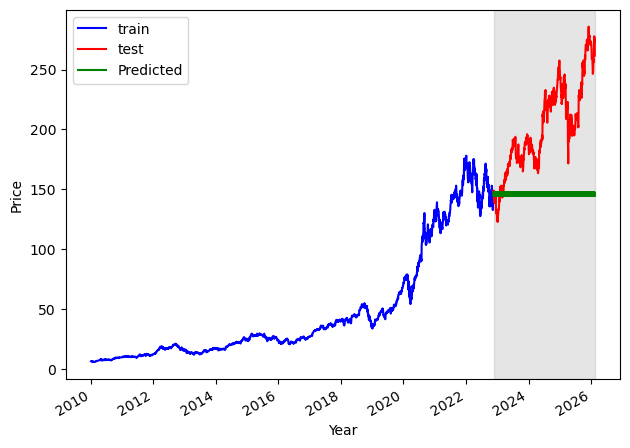

In [57]:
fig , ax = plt.subplots()

ax.plot(train.index, train["Close"],color = "blue", label = "train")
ax.plot(test.index, test["Close"],color = "red", label = "test")
ax.plot(test.index, test["last_season_value"], color = "green", label = "Predicted")
ax.set_xlabel("Year")
ax.set_ylabel("Price")
ax.legend(loc = "best")
ax.axvspan(xmin = test.index[0], xmax=test.index[-1],color = "grey", alpha = 0.2)

plt.tight_layout()
fig.autofmt_xdate() 
plt.show()

# Summary

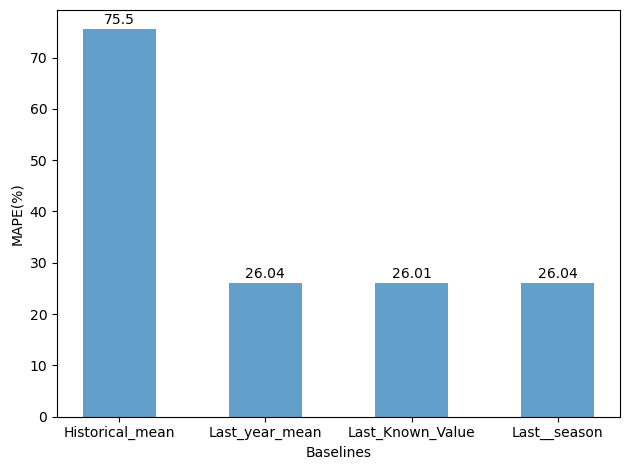

In [60]:
fig, ax = plt.subplots()

x = ["Historical_mean","Last_year_mean","Last_Known_Value","Last__season"]
y = [hist_mean_mape,last_year_mean_mape,last_year_known_mape,naive_season_mape]

ax.bar(x,y,width = 0.5, alpha = 0.7)
ax.set_xlabel("Baselines")
ax.set_ylabel("MAPE(%)")

for index,value in enumerate(y):
    plt.text(x = index, y = value+1, s = str(round(value,2)),ha = "center")

plt.tight_layout()

plt.show()